In [33]:
import os
import sys
import random
import math
import numpy as np
import skimage.io
import matplotlib
import matplotlib.pyplot as plt
import balloon
from model import log
# Root directory of the project
ROOT_DIR = os.getcwd()
if ROOT_DIR.endswith("samples/balloon"):
    # Go up two levels to the repo root
    ROOT_DIR = os.path.dirname(os.path.dirname(ROOT_DIR))

# Import Mask RCNN
sys.path.append(ROOT_DIR)  
import utils
import model as modellib
import visualize
# Import COCO config
sys.path.append(os.path.join(ROOT_DIR, "samples/coco/"))
#import coco

%matplotlib inline 

# Directory to save logs and trained model
MODEL_DIR = os.path.join(ROOT_DIR, "logs")
print(MODEL_DIR)

# Local path to trained weights file
# 最後一個訓練權重所在位置 C:\Users\Amber\Desktop\Mask_RCNN_balloon\logs\balloon20210408T0958\mask_rcnn_balloon_0030.h5
MY_MODEL_PATH = os.path.join(ROOT_DIR, " ") 
print(MY_MODEL_PATH)

COCO_MODEL_PATH = os.path.join(ROOT_DIR, "mask_rcnn_coco.h5")
print(COCO_MODEL_PATH)

# Download COCO trained weights from Releases if needed
if not os.path.exists(COCO_MODEL_PATH):
    utils.download_trained_weights(COCO_MODEL_PATH)

# Directory of images to run detection on
IMAGE_DIR = os.path.join(ROOT_DIR, "val")
print(IMAGE_DIR)

C:\Users\Amber\Desktop\Mask_RCNN_balloon\logs
C:\Users\Amber\Desktop\Mask_RCNN_balloon\ 
C:\Users\Amber\Desktop\Mask_RCNN_balloon\mask_rcnn_coco.h5
C:\Users\Amber\Desktop\Mask_RCNN_balloon\val


## Configurations

In [34]:
config = balloon.BalloonConfig()
config.display()
BALLOON_DIR = os.path.join(ROOT_DIR, "./")  # tarin和val所在位置
print(BALLOON_DIR)


Configurations:
BACKBONE                       resnet50
BACKBONE_SHAPES                [[256 256]
 [128 128]
 [ 64  64]
 [ 32  32]
 [ 16  16]]
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     1
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
DETECTION_MAX_INSTANCES        100
DETECTION_MIN_CONFIDENCE       0.9
DETECTION_NMS_THRESHOLD        0.3
GPU_COUNT                      1
IMAGES_PER_GPU                 1
IMAGE_MAX_DIM                  1024
IMAGE_MIN_DIM                  800
IMAGE_PADDING                  True
IMAGE_SHAPE                    [1024 1024    3]
LEARNING_MOMENTUM              0.9
LEARNING_RATE                  0.001
MASK_POOL_SIZE                 14
MASK_SHAPE                     [28, 28]
MAX_GT_INSTANCES               50
MEAN_PIXEL                     [123.7 116.8 103.9]
MINI_MASK_SHAPE                (56, 56)
NAME                           balloon
NUM_CLASSES                    2
POOL_SIZE                      7
POST_NMS_ROIS_INFERENC

In [35]:
# Create model object in inference mode.
model = modellib.MaskRCNN(mode="inference", model_dir=MODEL_DIR, config=config)


In [36]:
MY_MODEL_PATH = model.find_last()[1]
print(MY_MODEL_PATH)

C:\Users\Amber\Desktop\Mask_RCNN_balloon\logs\balloon20210422T1252\mask_rcnn_balloon_0030.h5


In [37]:
# Load weights trained on MS-COCO
# C:\Users\Amber\Desktop\Mask_RCNN_balloon\logs\balloon20210408T0958\mask_rcnn_balloon_0030.h5
model.load_weights(MY_MODEL_PATH, by_name=True)


In [38]:
# COCO Class names
# Index of the class in the list is its ID. For example, to get ID of
# the teddy bear class, use: class_names.index('teddy bear')
#填區分的類别
class_names = ['BG', 'One Punch Man'] 


In [39]:
def get_ax(rows=1, cols=1, size=16):
    """Return a Matplotlib Axes array to be used in
    all visualizations in the notebook. Provide a
    central point to control graph sizes.
    
    Adjust the size attribute to control how big to render images
    """
    _, ax = plt.subplots(rows, cols, figsize=(size*cols, size*rows))
    return ax


In [40]:
# Load validation dataset
dataset = balloon.BalloonDataset()
dataset.load_balloon(BALLOON_DIR, "val")

# Must call before using the dataset
dataset.prepare()

print("Images: {}\nClasses: {}".format(len(dataset.image_ids), dataset.class_names))


Images: 4
Classes: ['BG', 'One Punch Man']


In [41]:
image_id = random.choice(dataset.image_ids)
image, image_meta, gt_class_id, gt_bbox, gt_mask =\
    modellib.load_image_gt(dataset, config, image_id, use_mini_mask=False)
info = dataset.image_info[image_id]
print("image ID: {}.{} ({}) {}".format(info["source"], info["id"], image_id, 
                                       dataset.image_reference(image_id)))


image ID: balloon.21.jpg (3) C:\Users\Amber\Desktop\Mask_RCNN_balloon\./val\21.jpg


In [42]:
# Run object detection
results = model.detect([image], verbose=1)
print(results)


Processing 1 images
image                    shape: (1024, 1024, 3)       min:    0.00000  max:  255.00000
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000
image_metas              shape: (1, 10)               min:    0.00000  max: 1024.00000
[{'rois': array([[105, 230, 729, 704]]), 'class_ids': array([1]), 'scores': array([0.99972326], dtype=float32), 'masks': array([[[0],
        [0],
        [0],
        ...,
        [0],
        [0],
        [0]],

       [[0],
        [0],
        [0],
        ...,
        [0],
        [0],
        [0]],

       [[0],
        [0],
        [0],
        ...,
        [0],
        [0],
        [0]],

       ...,

       [[0],
        [0],
        [0],
        ...,
        [0],
        [0],
        [0]],

       [[0],
        [0],
        [0],
        ...,
        [0],
        [0],
        [0]],

       [[0],
        [0],
        [0],
        ...,
        [0],
        [0],
        [0]]], dtype=uint8)}]


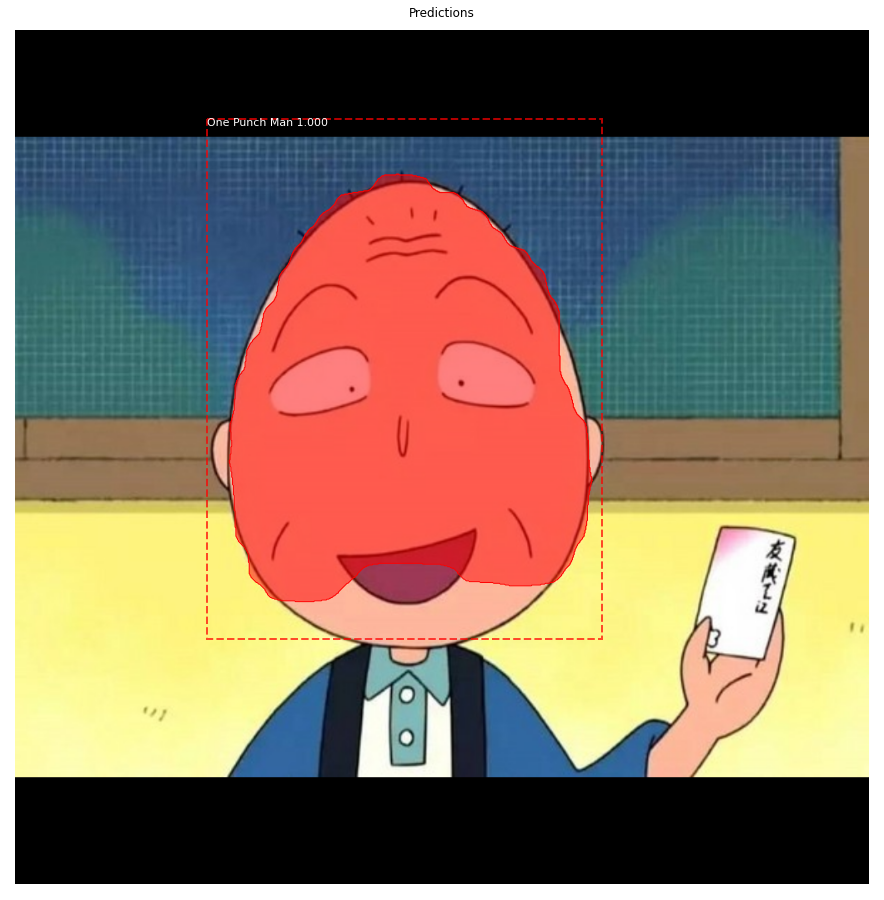

gt_class_id              shape: (1,)                  min:    1.00000  max:    1.00000
gt_bbox                  shape: (1, 4)                min:  165.00000  max:  748.00000
gt_mask                  shape: (1024, 1024, 1)       min:    0.00000  max:    1.00000


In [43]:
# Display results
ax = get_ax(1)
r = results[0]
visualize.display_instances(image, r['rois'], r['masks'], r['class_ids'], 
                            dataset.class_names, r['scores'], ax=ax,
                            title="Predictions")
log("gt_class_id", gt_class_id)
log("gt_bbox", gt_bbox)
log("gt_mask", gt_mask)